# Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import cv2

In [2]:
import os

In [3]:
import sys

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Input,Flatten,BatchNormalization,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,ModelCheckpoint
from tensorflow.keras import Model

In [5]:
np.random.seed(50)
tf.random.set_seed(50)

# Load the datasets

In [6]:
train_path = "Emotion/train/"
test_path = "Emotion/test/"
shape_of_images = (150,150)

In [7]:
def load_dataset(path,shape_of_images = (48,48)):
    list_labels = os.listdir(path)
    images = []
    labels = []
    for label in list_labels:
        if(os.path.isdir(path+label)):
            files_in_label = os.listdir(path+label+"/")
            for file in files_in_label:
                ext_of_file = file.split(".")[-1].lower()
                if (ext_of_file=="png" or ext_of_file=="jpg" or ext_of_file=="jpeg"):
                    image = cv2.imread(path+label+"/"+file)
                    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
                    image = cv2.resize(image,shape_of_images)
                    images.append(image)
                    labels.append(label)
    return images,labels

In [8]:
X_train,y_train = load_dataset(train_path,shape_of_images)
print(len(X_train),len(y_train))

28709 28709


In [9]:
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape,y_train.shape)

(28709, 150, 150) (28709,)


In [10]:
X_train.dtype

dtype('uint8')

(150, 150)


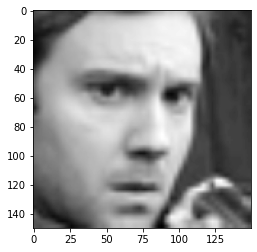

In [11]:
print(X_train[0].shape)
plt.imshow(X_train[0],cmap="gray")
plt.show()

In [12]:
 sys.getsizeof(X_train)

645952636

In [12]:
X_test,y_test = load_dataset(test_path,shape_of_images)
print(len(X_test),len(y_test))

7178 7178


In [13]:
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape,y_test.shape,X_test.dtype)

(7178, 150, 150) (7178,) uint8


In [14]:
print(y_train)

['angry' 'angry' 'angry' ... 'surprised' 'surprised' 'surprised']


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder = LabelEncoder()

In [17]:
y_train = label_encoder.fit_transform(y_train)
print(y_train)

[0 0 0 ... 6 6 6]


In [18]:
y_test = label_encoder.transform(y_test)
print(y_test)

[0 0 0 ... 6 6 6]


In [19]:
category = label_encoder.classes_
print(category)

['angry' 'disgusted' 'fearful' 'happy' 'neutral' 'sad' 'surprised']


In [20]:
batch_size = 64
n_train = X_train.shape[0]
n_val = X_test.shape[0]
epochs = 100

In [21]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)
val_datagen = ImageDataGenerator()

In [22]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],X_train.shape[2],1))

In [23]:
X_train.shape

(28709, 150, 150, 1)

In [24]:
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

In [25]:
X_test.shape

(7178, 150, 150, 1)

In [26]:
train_generator = train_datagen.flow(X_train, y_train,batch_size=batch_size)
val_generator = val_datagen.flow(X_test,y_test, batch_size=batch_size)

# Define the model

In [27]:
# Define a first model 
"""
def emotion_recognition(input_shape):
    X_input = Input(input_shape)
    # First convolution block 
    X = Conv2D(64,(3,3),padding="same",data_format="channels_first")(X_input)
    X = BatchNormalization(axis=1)(X)
    X = Activation("relu")(X)
    
    X = Conv2D(128,(3,3),padding="same",data_format="channels_first")(X)
    X = BatchNormalization(axis=1)(X)
    X = Activation("relu")(X)
    
    X = MaxPooling2D((2,2))(X)
    # Second convolution block 
    X = Conv2D(128,(3,3),padding="same",data_format="channels_first")(X)
    X = BatchNormalization(axis=1)(X)
    X = Activation("relu")(X)
    
    X = Conv2D(256,(3,3),padding="same",data_format="channels_first")(X)
    X = BatchNormalization(axis=1)(X)
    X = Activation("relu")(X)
    
    X = MaxPooling2D((2,2))(X)
    # Convolution block 3
    X = Conv2D(256,(3,3),padding="same",data_format="channels_first")(X)
    X = BatchNormalization(axis=1)(X)
    X = Activation("relu")(X)
    
    X = Conv2D(512,(3,3),padding="same",data_format="channels_first")(X)
    X = BatchNormalization(axis=1)(X)
    X = Activation("relu")(X)
    
    X = Conv2D(512,(3,3),padding="same",data_format="channels_first")(X)
    X = BatchNormalization(axis=1)(X)
    X = Activation("relu")(X)
    
    X = MaxPooling2D((2,2))(X)
    
    X = Flatten()(X)
    X = Dense(256,activation="relu")(X)
    X = Dropout(0.5)(X)
    X = Dense(7,activation="softmax")(X)
    
    model = Model(inputs=X_input, outputs=X)
    return model
"""

'\ndef emotion_recognition(input_shape):\n    X_input = Input(input_shape)\n    # First convolution block \n    X = Conv2D(64,(3,3),padding="same",data_format="channels_first")(X_input)\n    X = BatchNormalization(axis=1)(X)\n    X = Activation("relu")(X)\n    \n    X = Conv2D(128,(3,3),padding="same",data_format="channels_first")(X)\n    X = BatchNormalization(axis=1)(X)\n    X = Activation("relu")(X)\n    \n    X = MaxPooling2D((2,2))(X)\n    # Second convolution block \n    X = Conv2D(128,(3,3),padding="same",data_format="channels_first")(X)\n    X = BatchNormalization(axis=1)(X)\n    X = Activation("relu")(X)\n    \n    X = Conv2D(256,(3,3),padding="same",data_format="channels_first")(X)\n    X = BatchNormalization(axis=1)(X)\n    X = Activation("relu")(X)\n    \n    X = MaxPooling2D((2,2))(X)\n    # Convolution block 3\n    X = Conv2D(256,(3,3),padding="same",data_format="channels_first")(X)\n    X = BatchNormalization(axis=1)(X)\n    X = Activation("relu")(X)\n    \n    X = Conv2

In [28]:
# Define a second model to know if it's better than first
model = Sequential()
model.add(Input((150,150,1)))
model.add(Conv2D(64,3,padding="same",activation="relu"))
model.add(Conv2D(64,3,padding="same",activation="relu"))
model.add(MaxPooling2D(2))
model.add(Dropout(0.4))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(128,3,padding="same",activation="relu"))
model.add(Conv2D(128,3,padding="same",activation="relu"))
model.add(MaxPooling2D(2))
model.add(Dropout(0.4))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(256,3,padding="same",activation="relu"))
model.add(Conv2D(256,3,padding="same",activation="relu"))
model.add(Conv2D(256,3,padding="same",activation="relu"))
model.add(MaxPooling2D(2))
model.add(Dropout(0.4))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(512,3,padding="same",activation="relu"))
model.add(Conv2D(512,3,padding="same",activation="relu"))
model.add(Conv2D(512,3,padding="same",activation="relu"))
model.add(MaxPooling2D(2))
model.add(Dropout(0.4))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(512,3,padding="same",activation="relu"))
model.add(Conv2D(512,3,padding="same",activation="relu"))
model.add(Conv2D(512,3,padding="same",activation="relu"))
model.add(MaxPooling2D(2))
model.add(Dropout(0.4))
model.add(BatchNormalization(axis=3))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(7,activation="softmax"))

In [29]:
input_shape = (150,150,1)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 75, 75, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       7

In [31]:
# Callbacks
NAME = "CNN_Emotion2"
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
checkpoint = ModelCheckpoint(filepath='ModelSave/CNN_Emotion2.{epoch:02d}.h5',save_best_only=True)

In [32]:
from tensorflow.keras.optimizers import Adam

In [33]:
model.compile(optimizer=Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=['acc'])
# For that model we will use a classification loss and metrics

# Train the model

In [34]:
history = model.fit(train_generator,
                    epochs=epochs,
                    steps_per_epoch = n_train//batch_size,
                    validation_data = val_generator,
                    validation_steps = n_val//batch_size,
                    callbacks = [tensorboard,checkpoint])

Epoch 1/100
448/448 [==============================] - 100s 201ms/step - loss: 1.8765 - acc: 0.2185 - val_loss: 2.1786 - val_acc: 0.2469
Epoch 2/100
448/448 [==============================] - 87s 193ms/step - loss: 1.8156 - acc: 0.2481 - val_loss: 1.8074 - val_acc: 0.2489
Epoch 3/100
448/448 [==============================] - 87s 193ms/step - loss: 1.8102 - acc: 0.2476 - val_loss: 1.8098 - val_acc: 0.2429
Epoch 4/100
448/448 [==============================] - 86s 192ms/step - loss: 1.8023 - acc: 0.2503 - val_loss: 1.9395 - val_acc: 0.2062
Epoch 5/100
448/448 [==============================] - 86s 192ms/step - loss: 1.7978 - acc: 0.2495 - val_loss: 1.9290 - val_acc: 0.1787
Epoch 6/100
448/448 [==============================] - 86s 193ms/step - loss: 1.7950 - acc: 0.2506 - val_loss: 1.7995 - val_acc: 0.2487
Epoch 7/100
448/448 [==============================] - 86s 192ms/step - loss: 1.7895 - acc: 0.2549 - val_loss: 1.8982 - val_acc: 0.2472
Epoch 8/100
448/448 [==========================

In [35]:
model.save("ModelSave/CNN_Emotion_Final_100.h5")

In [29]:
%load_ext tensorboard
import datetime
logs_base_dir = "logs"
os.makedirs(logs_base_dir, exist_ok=True)
%tensorboard --logdir {logs_base_dir}

In [28]:
model = tf.keras.models.load_model("ModelSave/CNN_Emotion_Final_100.h5")

In [30]:
NAME = "CNN2_Emotion"
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
checkpoint = ModelCheckpoint(filepath='ModelSave/CNN2_Emotion.{epoch:02d}.h5',save_best_only=True)

In [31]:
history = model.fit(train_generator,
                    epochs=20,
                    steps_per_epoch = n_train//batch_size,
                    validation_data = val_generator,
                    validation_steps = n_val//batch_size,
                    callbacks = [tensorboard,checkpoint])

Epoch 1/20
287/287 [==============================] - 93s 288ms/step - loss: 0.7434 - acc: 0.7252 - val_loss: 0.8888 - val_acc: 0.6893
Epoch 2/20
287/287 [==============================] - 81s 281ms/step - loss: 0.7395 - acc: 0.7248 - val_loss: 1.0212 - val_acc: 0.6596
Epoch 3/20
287/287 [==============================] - 81s 281ms/step - loss: 0.7363 - acc: 0.7256 - val_loss: 0.9493 - val_acc: 0.6761
Epoch 4/20
287/287 [==============================] - 80s 279ms/step - loss: 0.7347 - acc: 0.7290 - val_loss: 0.9273 - val_acc: 0.6773
Epoch 5/20
287/287 [==============================] - 79s 276ms/step - loss: 0.7328 - acc: 0.7278 - val_loss: 0.8802 - val_acc: 0.6901
Epoch 6/20
287/287 [==============================] - 80s 278ms/step - loss: 0.7232 - acc: 0.7288 - val_loss: 0.9771 - val_acc: 0.6756
Epoch 7/20
287/287 [==============================] - 79s 276ms/step - loss: 0.7272 - acc: 0.7295 - val_loss: 0.9521 - val_acc: 0.6855
Epoch 8/20
287/287 [==============================] - 8